## Q.NO 1

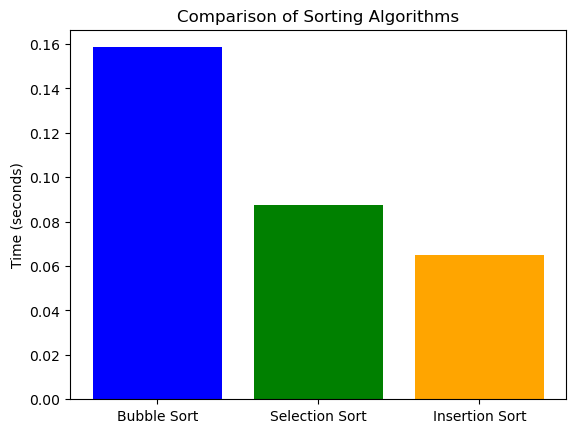

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# Generate 1000 random integers between 1 and 10000
random_numbers = np.random.randint(1, 10001, size=1000)

# Define sorting algorithms to compare
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Measure time taken for each sorting algorithm
bubble_time = timeit.timeit(lambda: bubble_sort(random_numbers.copy()), number=1)
selection_time = timeit.timeit(lambda: selection_sort(random_numbers.copy()), number=1)
insertion_time = timeit.timeit(lambda: insertion_sort(random_numbers.copy()), number=1)

# Plotting
sorting_algorithms = ['Bubble Sort', 'Selection Sort', 'Insertion Sort']
times = [bubble_time, selection_time, insertion_time]

plt.bar(sorting_algorithms, times, color=['blue', 'green', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Comparison of Sorting Algorithms')
plt.show()


## Q.NO 2

In [2]:
import heapq

def print_sorted_lists(lists):
    heap = []  # min-heap to store elements
    result = []  # to store the sorted order

    # Insert the first element from each list/array into the min-heap
    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))  # (value, list index, element index)

    # Pop the smallest element and insert the next element from the same list
    while heap:
        val, lst_index, ele_index = heapq.heappop(heap)
        result.append(val)
        
        # Check if there are more elements in the same list
        if ele_index + 1 < len(lists[lst_index]):
            next_val = lists[lst_index][ele_index + 1]
            heapq.heappush(heap, (next_val, lst_index, ele_index + 1))

    return result

# sorted list
lists = [
    [10, 20,30,40],
    [15,25,35],
    [27,29,37,48,93],
    [32,33]
]
print("Sorted lists in sorted order:")
print(print_sorted_lists(lists))


Sorted lists in sorted order:
[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


## Q.NO 3

In [3]:
def find_k_largest(nums, k):
    nums.sort(reverse=True)
    return nums[:k]

# Example usage:
arr = [3, 10, 4, 5, 7, 8, 9]
k = 3
result = find_k_largest(arr, k)
print("K largest elements:", result)


K largest elements: [10, 9, 8]


## Q.NO 4

In [4]:
def max_activities(activities):
    # Sort activities based on their finish times
    sorted_activities = sorted(activities, key=lambda x: x[1])
    
    # Initialize variables
    prev_finish_time = float('-inf')
    max_activities_count = 0
    selected_activities = []
    
    # Iterate through sorted activities
    for activity in sorted_activities:
        start_time, finish_time = activity
        # If the current activity can be performed without overlapping with previous activity
        if start_time >= prev_finish_time:
            max_activities_count += 1
            prev_finish_time = finish_time
            selected_activities.append(activity)
    
    return max_activities_count, selected_activities

# Example usage:
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3,8), (5, 9),(6,10),(8,11),(8,12),(2,13),(12,14)]
max_count, selected_activities = max_activities(activities)
print("Maximum number of activities:", max_count)
print("Activities performed:", selected_activities)


Maximum number of activities: 4
Activities performed: [(1, 4), (5, 7), (8, 11), (12, 14)]


## Q.NO 5

In [5]:
def merge_intervals(intervals):
    if not intervals:
        return []
    
    # Sort intervals based on start times
    sorted_intervals = sorted(intervals, key=lambda x: x[0])
    
    merged_intervals = [sorted_intervals[0]]
    
    for interval in sorted_intervals[1:]:
        prev_start, prev_end = merged_intervals[-1]
        start, end = interval
        
        # If the current interval overlaps with the previous merged interval, merge them
        if start <= prev_end:
            merged_intervals[-1] = (prev_start, max(prev_end, end))
        else:
            merged_intervals.append(interval)
    
    return merged_intervals

def non_overlapping_intervals(intervals):
    merged_intervals = merge_intervals(intervals)
    non_overlapping = [merged_intervals[0]]
    
    for interval in merged_intervals[1:]:
        if interval[0] > non_overlapping[-1][1]:
            non_overlapping.append(interval)
    
    return non_overlapping

# Example usage:
intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]
non_overlapping = non_overlapping_intervals(intervals)
print("Non-overlapping intervals after merging:")
print(non_overlapping)


Non-overlapping intervals after merging:
[(1, 5), (6, 9)]
